In [1]:
import pandas as pd
import brandseg
import lexical_features as lf
import lexical_features_url as lfu
from tqdm import tqdm_notebook
import warnings
import tldextract 

warnings.filterwarnings("ignore")

In [2]:
bs = brandseg.BrandSeg()

In [3]:
# list of fqdns/apex 
df = pd.read_csv('./data/pub_mal_w1_gt_vt_pdns.csv')
# origin URLs
df_url = pd.read_csv('/export/sec02/nabeel/ucsc/DATA/part-00000-126eeb85-de53-48c1-b105-6c5407725d74-c000.csv')
# Alexa APEXs
df_alexa = pd.read_csv('/export/sec02/nabeel/ucsc/DATA/part-00000-15d12af0-8f59-4878-a4d1-a5fd321b773d-c000.csv')
# VT reports
df_vt = pd.read_csv('/export/sec02/nabeel/ucsc/DATA/part-00000-319fd059-a1d5-4337-8eaf-791e396edd89-c000.csv')
# path
df_path = pd.read_csv('/export/sec02/nabeel/ucsc/DATA/part-00000-769c4dfa-3c03-4b3d-8edb-140386616120-c000.csv')

In [4]:
print(df.shape,df_url.shape,df_alexa.shape,df_vt.shape,df_path.shape)

(1770, 14) (3477, 2) (65, 2) (1770, 6) (1770, 6)


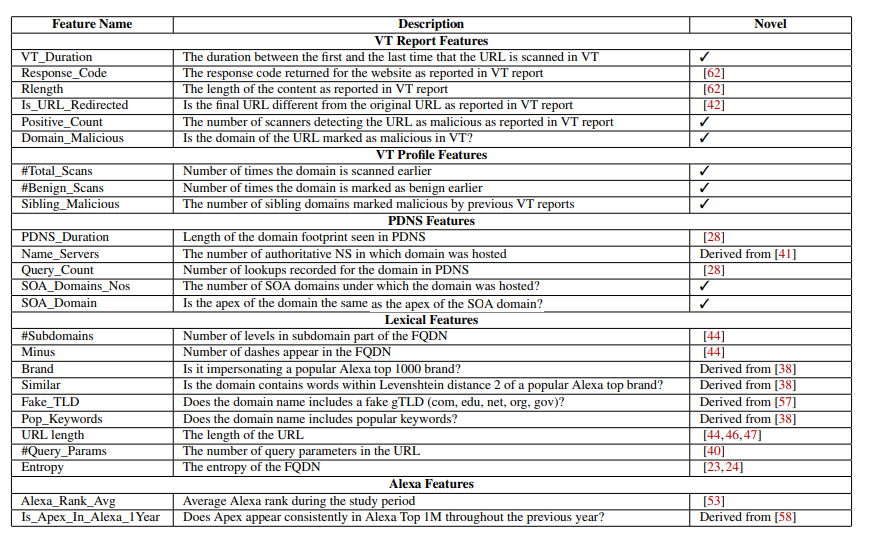

### VT Report Features

* Response_Code
* Rlength
* Is_URL_Redirected
* Positive_Count 
* <i> Domain_Malicious </i>

In [5]:
st1 = []
for index , row in tqdm_notebook(df.iterrows()):
    data = df_vt.loc[df_vt.fqdn==row.fqdn]
    if data.shape[0] == 1:
        
        row.set_value('positives',int(data.positives))
        row.set_value('response_code', data.response_code)
        row.set_value('rlength',data.rlength)
        row.set_value('url_after_redirects',data.url_after_redirects)
        row.set_value('url',data.url)
        
        st1.append(row)

    else:
        print('Error', row)
        break
        
st1 = pd.DataFrame(st1)

In [6]:
dms =  pd.read_csv('./data/pub_mal_w1_gt_labeled_unbalanced_v2.csv')

In [7]:
st2 = []
for index , row in tqdm_notebook(st1.iterrows()):
    data = dms.loc[dms.fqdn==row.fqdn]
    if data.shape[0] == 1:
        
        row.set_value('domain_malicious',data.domain_malicious)
        st2.append(row)

    else:
        print('Error', row)
        break
        
st2 = pd.DataFrame(st2)

### VT Profile Features

In [8]:
#Done

### Lexical Features

* suspicious_tld
* length
* entropy
* fake_tld
* brand
* pop_keywords
* similar
* is_idn
* minus
* num_subdomains

In [9]:
st3 = []

for index , row in tqdm_notebook(st2.iterrows()):
    for key, value in lf.get_features(row.fqdn,bs).items():
        row.set_value(key, value)
    st3.append(row)
    
st3 = pd.DataFrame(st3)

### Additional URL Features (To address the comment of considering path features in the decision making)


* std_urls_per_subdomain
* mean_path_depth_per_subdomain
* std_path_depth_per_subdomain
* std_query_parameters_per_subdomain_paths
* std_path_length_per_subdomain_paths
* std_number_of_popular_keywords_per_subdomain_paths

In [10]:
def urlencode(x):
    url = tldextract.extract(x)
    return '{}.{}'.format(url.domain,url.suffix)

In [11]:
df_path

,fqdn,mean_urls_per_subdomain,mean_path_depth_per_subdomain,mean_query_parameters_per_subdomain_paths,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths
0,skyglowproject.blogspot.com,35.571430,1.00,0.0,0.000000,0.0
1,moviested.blogspot.ru,71.833336,2.75,0.0,15.026828,0.0
2,cottonfriends.blogspot.com,55.312500,2.00,0.0,15.231033,0.0
3,bloggersemende.blogspot.com,82.000000,3.00,0.0,0.000000,0.0
4,watafuku.web.fc2.com,32.444443,1.00,0.0,1.571348,0.0
...,...,...,...,...,...,...
1765,ebay-payments018.webcindario.com,40.647060,1.00,0.0,0.000000,0.0
1766,applestore.servehalflife.com,36.000000,1.00,0.0,0.000000,0.0
1767,apple-appleid.ddnsking.com,39.000000,1.00,0.0,1.000000,0.0
1768,coinbase10000.webcindario.com,37.000000,1.00,0.0,0.000000,0.0


In [12]:
st4 = []
for index , row in tqdm_notebook(st3.iterrows()):
    data = df_path.loc[df_path.fqdn==row.fqdn]
    if data.shape[0] == 1:
        
        row.set_value('mean_urls_per_subdomain',float(data.mean_urls_per_subdomain))
        row.set_value('mean_path_depth_per_subdomain',float(data.mean_path_depth_per_subdomain))
#         row.set_value('std_path_depth_per_subdomain',float(data.std_path_depth_per_subdomain))
        row.set_value('mean_query_parameters_per_subdomain_paths',float(data.mean_query_parameters_per_subdomain_paths))
        row.set_value('mean_path_length_per_subdomain_paths',float(data.mean_path_length_per_subdomain_paths))
        row.set_value('mean_number_of_popular_keywords_per_subdomain_paths',float(data.mean_number_of_popular_keywords_per_subdomain_paths))

        st4.append(row)

    else:
        print('Error', row)
        break
        
st4 = pd.DataFrame(st4)

* url_length
* #query_parameters
* #brands_in_path
* #suspicious_keywords_in_path
* #dots_in_path
* #similar_keywords_in_path

In [13]:
# lfu.scan('https://ucsc.qcri.org/notebooks/Compromised_Domains/Gamma/Features%20Extraction.ipynb')

st5 = []

for index , row in tqdm_notebook(st4.iterrows()):
    for key, value in lfu.scan(str(row.url)).items():
        row.set_value(key, value)
    st5.append(row)
    
st5 = pd.DataFrame(st5)

### Alexa Features

* Alexa_Rank_Avg
* Number_of_days_in_Alexa_top
* Is_Apex_In_Alexa_1Year

In [14]:
st6 = []
for index , row in tqdm_notebook(st5.iterrows()):
    data = df_alexa.loc[df_alexa.fqdn==row.fqdn]
    if data.shape[0] == 1:
        row.set_value('Alexa_Rank_Avg',float(data.alexa_r))
    else:
        row.set_value('Alexa_Rank_Avg',1000000)

    st6.append(row)
        
st6 = pd.DataFrame(st6)

In [15]:
unq = [i.split()[0] for i in open('./data/alexa_1year_1m_0801_0819.domains.uniq','r').readlines()]

In [16]:
FINAL = []

for index, row in tqdm_notebook(st6.iterrows()):
    isIN = row.fqdn in unq
    row.set_value('Is_FQDN_In_Alexa_1Year',isIN)
    FINAL.append(row)
    
FINAL = pd.DataFrame(FINAL)

### PDNS Features

In [17]:
#done

### Final

In [18]:
FINAL.head(5)

,fqdn,vt_duration,vt_count,vt_mal_count,vt_ratio,firstseen,lastseen,#query,#ip,#ns,...,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,bankofamericatec.webcindario.com,9417600.0,12.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,...,3.299454,0.0,81,1,2,1,0,0,1000000.0,False
1,ftp.tamraj.fartit.com,41644800.0,54.0,54.0,1.0,2017-04-12 03:57:25,2020-09-29 23:10:27,234833.0,2.0,2.0,...,0.000000,0.0,62,1,3,0,0,0,1000000.0,False
2,bluewin5.godaddysites.com,43891200.0,49.0,49.0,1.0,2018-06-22 10:01:56,2020-08-11 19:36:27,590.0,1.0,1.0,...,0.000000,0.0,66,1,2,0,0,0,1000000.0,False
3,appleid-applepage8.serveirc.com,4147200.0,10.0,10.0,1.0,2019-05-05 00:01:14,2019-05-08 18:08:38,132.0,1.0,1.0,...,0.000000,0.0,82,1,2,1,0,0,1000000.0,False
4,paypl-secureded.000webhostapp.com,2764800.0,4.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.489898,0.0,81,1,2,0,0,0,1000000.0,False


In [19]:
# FINAL = FINAL.fillna(0)

In [20]:
FINAL.to_csv('public_ac_n_c_final.csv')